# ANN - DNN - Bank Churn Rate

# Introduction

Below we are going to work on the usual case of the bank churn rate with predictors associated to customer profile and an dependent variable indicating whether or not the customer remains with the bank. Using a predictive model of neural network model of the DNN type.

## 1. Import libraries

In [1]:
import numpy as np
import sys # para que luego nos deje imprimir y ver las matrices completas
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 2. Load datasets

The file is in [kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling) 'Churn_Modelling.csv' and the variables included are:

* RowNumber: identifier
* Customerid: customer number
* Surname
* CreditScore
* Geography: country
* Age
* Tenure: years of service
* Balance: customer's bank balance
* NumOfProducts: number of products contracted with the bank.
* HasCrCard: 1.- has a credit card with the bank. 2.- does not have a credit card with the bank.
* IsActiveMember: has movements: 1.-Yes, 0.
* EstimatedSalary: estimated salary.
* Exited: this is our target. 0.- stays. 1. 1.- not remain


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Dataset analysis

Check briefly the information from the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# See the values taken by Geography
df.groupby('Geography')[['CustomerId']].count()

,CustomerId
Geography,
France,5014
Germany,2509
Spain,2477


In [5]:
# See the values taken by Gender
df.groupby('Gender')[['CustomerId']].count()

,CustomerId
Gender,
Female,4543
Male,5457


See that there are some variables that do not provide us with information, such as the first three: RowNumber, Customerid and Surname. We will eliminate them from the dataset and create the vectors X with the independent variables and y with the target variable.

In [6]:
# independent variables, we exclude: RowNumber, CustomerId, Surname
X = df.iloc[:, 3:-1].values # Not include the last one which is target

y=df['Exited']
np.set_printoptions(threshold=sys.maxsize)
X

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [528, 'France', 'Male', 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [497, 'Spain', 'Male', 24, 3, 0.0, 2, 1, 0, 76390.01],
       [476, 'France', 'Female', 34, 10, 0.0, 2, 1, 0, 26260.98],
       [549, 'France', 'Female', 25, 5, 0.0, 2, 0, 0, 190857.79],
       [635, 'Spain', 'Female', 35, 7, 0.0, 2, 1, 1, 65

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

There are two categorical variables that we need to transform in order to use them in the model: Geography and Gender. We will use the ScikitLearn LabelEncoder class to assign them a numeric value. We then apply one-hot encoding to create a column for each value. 

To avoid multicollinearity problems with the variable Geography, which has three values, we eliminate one of the dummy variables created.

In [8]:
# Import the classes from ScikitLearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

print(X[:5,:])
print('-------------')


# Geography label
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

print(X[:5,:])
print('-------------')


# Gender label
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

print(X[:5,:])
print('-------------')

# Dummy for Geography
onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    remainder='passthrough'                       
)
X = onehotencoder.fit_transform(X)

print(X[:5,:])
print('-------------')

# Para evitar la multiculinealidad eliminamos una de las variables dummy creadas con Geography.
X = X[:, 1:]

print(X[:5,:])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]
-------------
[[619 0 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 2 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 0 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 0 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 2 'Female' 43 2 125510.82 1 1 1 79084.1]]
-------------
[[619 0 0 42 2 0.0 1 1 1 101348.88]
 [608 2 0 41 1 83807.86 1 0 1 112542.58]
 [502 0 0 42 8 159660.8 3 1 0 113931.57]
 [699 0 0 39 1 0.0 2 0 0 93826.63]
 [850 2 0 43 2 125510.82 1 1 1 79084.1]]
-------------
[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]
-------------
[[0.0 0.0 619 0

## 4. Train model

Split the data into train and test with 20% of the observations.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

Scale the variables.. Over all EstimatedSalary and Balance which have larger values.

__Please note__: this step is essential if we don't want variables with larger scale to unduly influence the network, since as we know they are based on adding the product of the weights by the values.

In [10]:
# Import the class for scaling
from sklearn.preprocessing import StandardScaler

# Apply and transform on X_train
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

# Note: on test we transform by applying the mean and standard deviation of train.
X_test = sc_X.transform(X_test)

In [11]:
X_train

array([[-5.79852132e-01, -5.74078591e-01, -2.82224746e-01,
         9.13938358e-01,  1.14919188e+00,  1.72112731e+00,
         7.51433430e-01,  8.25468532e-01,  6.44342907e-01,
         9.77258519e-01,  4.77539419e-01],
       [ 1.72457760e+00, -5.74078591e-01, -2.10128796e-01,
        -1.09416570e+00, -9.54832618e-01, -1.04325013e+00,
         3.26451162e-01,  8.25468532e-01,  6.44342907e-01,
         9.77258519e-01, -1.19840318e+00],
       [-5.79852132e-01, -5.74078591e-01, -1.00318425e+00,
         9.13938358e-01, -7.63557663e-01, -1.38879731e+00,
        -1.22473649e+00,  8.25468532e-01, -1.55196866e+00,
         9.77258519e-01,  1.60692405e+00],
       [ 1.72457760e+00, -5.74078591e-01, -6.42704495e-01,
        -1.09416570e+00, -1.91120739e+00,  1.37558013e+00,
         1.12367340e-01, -9.10989069e-01,  6.44342907e-01,
         9.77258519e-01,  7.42261352e-01],
       [-5.79852132e-01, -5.74078591e-01, -5.56374745e-02,
        -1.09416570e+00,  5.75367017e-01, -6.97702949e-01,
  

In [12]:
y_train

5525    0
5034    0
4709    0
4218    1
917     0
       ..
664     0
7540    0
7221    0
1318    1
8915    1
Name: Exited, Length: 8000, dtype: int64

Now we create our network. The models in Keras are defined as a sequence of layers with the Sequential method and add layers one by one until they meet our requirements. So we import the functions we are going to use.

In [13]:
import keras

# Import the Sequential class to initialise the network parameters.
# https://keras.io/api/models/sequential/#sequential-class
from keras.models import Sequential

# Import the Dense class to create each of the intermediate layers of the network.
# https://keras.io/api/layers/core_layers/dense/
from keras.layers.core import Dense

In [14]:
# Initialise the network
classifier = Sequential()

Some considerations when creating the network:

* The first step is to make sure that the first layer has the correct number of inputs with the input_dim argument, in our data it is 11 input variables.
* How do we know the number of layers and their types? This is the question that does not have a clear answer, usually by trial and error you can arrive at an optimal result by looking at the output graphs. In this case we are going to use a fully connected network with 3 layers of Dense class. In this class we define the number of neurons, units, as the first argument and the activation function. In the first 2 layers a relu activation function will be defined and for the output layer a sigmoid function. In our case we use the sigmoid function in the output layer to make sure that the output value is between 0 and 1 , it gives us the probability of belonging to the class. Let's go step by step:

__First layer__: we use ReLU as the activation function, 11 input nodes (these are the 11 independent variables of the data X) and 6 output nodes (the average of (11 vbles input + 1 output)/2 =6).

In [15]:
classifier.add(Dense(units = 6, # Nº of nodes to add in the hidden layer. Xtrain(11) and y_train(1). mean=6
                     activation = "relu", # Activation function
                     input_dim = 11 # Input layer nodes. number of independent variables in X_train
                    )
              )

__Second layer__: same as the first layer, but it is not necessary to say the number of input nodes as it is taken from the previous layer.

In [16]:
classifier.add(Dense(units = 6,activation = "relu"))

__Output layer:__: 

In [17]:
# we select an output node with sigmoid f.activation that returns the prob.
# if we had more than two categories (not just go bank or stay), we would have to change the number of output nodes to the number of categories and the f.activation of 'softmax' so that the sum of prob.
# of output nodes to the number of categories and the f.activation of 'softmax' so that the sum of the prob. is 1.

classifier.add(Dense(units = 1,  
                     activation = "sigmoid" 
                    )
              )

Una vez que tenemos la red completa con su capa de inicio, capas ocultas y capa de salida, se procede a compilarlo. Cuando se compila el modelo, llamamos al método compile de Keras y definimos los siguientes parámetros:

* __loss__:  es la función de coste para evaluar los pesos. En nuestro caso, como es un problema de clasificación binaria, vamos a utilizar binary_crossentropy.
* __optimizer__: es el método para calcular el gradiente descendente, utilizaremos adam.
* __metrics__: utilizaremos la accuracy como métrica de precisión.

In [18]:
# Call the 'compile' method to compile the network.

classifier.compile(optimizer = "adam", # Algorithm that minimises the cost function
                   loss = "binary_crossentropy", # Classification
                   metrics = ["accuracy"] # Adjustment measure
                  )

Train the network using the fit method, to train this network we will use batch_size of 50, which is the number of observations we are going to use to propagate the network and a number of epochs of 20 applying the trained network to the dataset X_test and comparing the results with y_test. 

For the execution of each epoch we can see the following on the screen when running the code:

In [19]:
# For each epoch we will have the value of the cost function and the accuracy

history = classifier.fit(X_train, y_train,
               batch_size = 50,
               epochs = 20,
               validation_data=(X_test, y_test)
              )

Epoch 1/20
160/160 [==============================] - 1s 3ms/step - loss: 0.5512 - accuracy: 0.7661 - val_loss: 0.5096 - val_accuracy: 0.7920
Epoch 2/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8025 - val_loss: 0.4713 - val_accuracy: 0.8045
Epoch 3/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8129 - val_loss: 0.4528 - val_accuracy: 0.8095
Epoch 4/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8166 - val_loss: 0.4404 - val_accuracy: 0.8085
Epoch 5/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8185 - val_loss: 0.4333 - val_accuracy: 0.8110
Epoch 6/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8195 - val_loss: 0.4293 - val_accuracy: 0.8175
Epoch 7/20
160/160 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8219 - val_loss: 0.4263 - val_accuracy: 0.8170
Epoch 

Evaluate the model by using the history argument to store the values in a dictionary.

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We represent the values stored in the dictionary in two curves:

* __Loss__: Cost function. According to the representation we see how the network decreases the cost function in both datasets, training and test, in a similar way, which is correct.

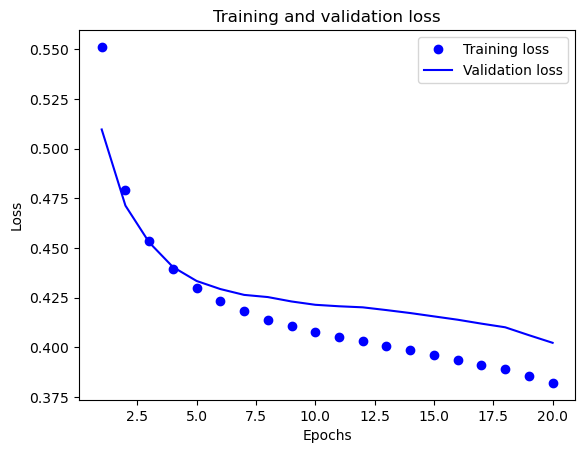

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

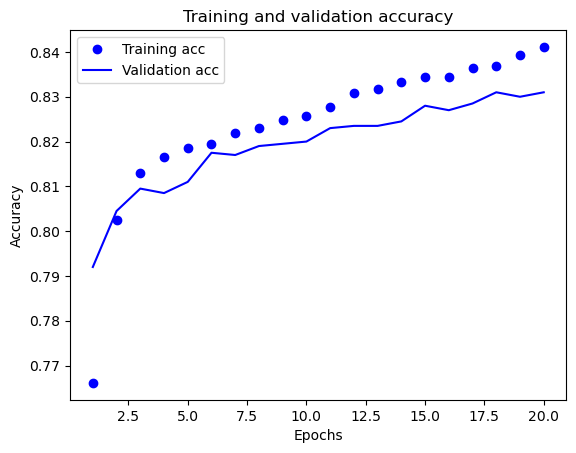

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

See that the average accuracy in both datasets is 83, we will consider that above 75-80 the model is good enough.

In [23]:
print('Training accuracy: ', round(np.mean(acc)*100,2))
print('Test accuracy: ', round(np.mean(val_acc)*100,2))

Training accuracy:  82.39
Test accuracy:  81.94


Predictions on the test data and define a threshold of 0.75 to identify those customers who will leave the bank.

In [24]:
y_pred  = classifier.predict(X_test)

# Prob. of the customer leaving the bank
print(y_pred)

# Say that a customer with a prob. greater than 0.75 leaves the bank and convert it into a Boolean vector.
y_pred = (y_pred>0.75)

63/63 [==============================] - 0s 1ms/step
[[0.02607233]
 [0.0593267 ]
 [0.58237326]
 [0.03375432]
 [0.08757047]
 [0.12957609]
 [0.2916304 ]
 [0.06140964]
 [0.6839134 ]
 [0.5781217 ]
 [0.13161173]
 [0.28076905]
 [0.03037406]
 [0.3237357 ]
 [0.2184519 ]
 [0.16647518]
 [0.06933144]
 [0.1411763 ]
 [0.3539312 ]
 [0.10318229]
 [0.07789623]
 [0.16240318]
 [0.08853135]
 [0.7567882 ]
 [0.11865812]
 [0.09118856]
 [0.35434723]
 [0.04588077]
 [0.2746217 ]
 [0.34661523]
 [0.08081531]
 [0.20245026]
 [0.09844463]
 [0.3092183 ]
 [0.21326488]
 [0.04096867]
 [0.03431095]
 [0.02625567]
 [0.02831413]
 [0.04179436]
 [0.7595888 ]
 [0.11277532]
 [0.06589387]
 [0.20748131]
 [0.02248892]
 [0.09785184]
 [0.05004417]
 [0.13222183]
 [0.18363002]
 [0.2371722 ]
 [0.16537315]
 [0.08445276]
 [0.0359013 ]
 [0.0135978 ]
 [0.05671448]
 [0.26559687]
 [0.47358102]
 [0.040239  ]
 [0.12578396]
 [0.02870774]
 [0.02744041]
 [0.14920291]
 [0.4803288 ]
 [0.89175546]
 [0.11718462]
 [0.18238114]
 [0.69405764]
 [0.09507

In [25]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Extract the confusion matrix using the confusion_matrix class of scikitlearn. In the main diagonal we obtain the correctly classified values.

In [26]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,1584,4
1,350,62


Let's improve predictions. Adjust the network, for this we will use the GridSearch method of ScikitLearn that allows us to make different combinations of parameter values and use cross validation in the same sequence. 

To do this we will create a function where we will include as parameters the optimizer and the activation function. 

In [27]:
from sklearn.model_selection import GridSearchCV

def red(optimizer, activation):
    '''
    Function to train a network with two parameters:
    - optimizer: we will include one of the following most used values: adam, rmsprop
    - activation: Most commonly used activation f.s: relu, tanh
    '''
    # creamos la red
    clas1 = Sequential()
    clas1.add(Dense(units = 6,  activation = activation, input_dim = 11))
    clas1.add(Dense(units = 6,  activation = activation))
    clas1.add(Dense(units = 1,  activation = "sigmoid"))
    # compilamos la red
    clas1.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

In [28]:
# We use the KerasClassifier class to call the function and have it return the compiled model

from keras.wrappers.scikit_learn import KerasClassifier

clas1 = KerasClassifier(build_fn = red)

We have to create a dictionary with the parameters we want to include in the GridSearch. I have included batch_size, epochs, optimizer and activation with different values for each of them.

Within the GridSearch call we select the type of scoring, we continue with the accuracy as it is a classification model and the value of cross validation, we will split it into 10 subsamples, cv.

This step takes a long time to run because it has to run the network for each given combination of parameters. In case we have a much larger volume of parameters there is another function in ScikitLearn called RandomSearch that works the same as GridSearch but selects the parameters in a random way and thus does not run all the combinations. In our case it is not necessary.

In [29]:
# Dict of parameters
parameters = {
    'batch_size' : [10,25,50,100],
    'nb_epoch' : [20,50,100, 200], 
    'optimizer' : ['adam', 'rmsprop'],
    'activation' : ['relu', 'tanh']
}

# Run the model included in the network function for each combination of parameters.
grid_search = GridSearchCV(estimator = clas1, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)

# Save the combination that has the best accuracy 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

720/720 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8664


25/25 [==============================] - 0s 1ms/step


144/144 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8704


25/25 [==============================] - 0s 3ms/step


25/25 [==============================] - 0s 1ms/step


25/25 [==============================] - 0s 2ms/step


288/288 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8675


25/25 [==============================] - 0s 1ms/step


144/144 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8668


25/25 [==============================] - 0s 2ms/step


25/25 [==============================] - 0s 2ms/step


80/80 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8689


Once run we see which combination of parameters gets the best accuracy.

In [30]:
print(best_parameters)
print(best_accuracy)

{'activation': 'tanh', 'batch_size': 100, 'nb_epoch': 20, 'optimizer': 'adam'}
0.869375


With this combination we train the net again:

In [31]:
# por cada epoch tendremos el valor de la función de coste y el accuracy
clas = Sequential()
clas.add(Dense(units = 6, activation = "relu", input_dim = 11))
clas.add(Dense(units = 6, activation = "relu"))
clas.add(Dense(units = 1,activation = "sigmoid"))

clas.compile(optimizer = "adam", 
                   loss = "binary_crossentropy", 
                   metrics = ["accuracy"] 
                  )

history1 = clas.fit(X_train, y_train,
               batch_size = 25, 
               epochs = 100, 
               validation_data=(X_test, y_test)
              )

Epoch 1/100
320/320 [==============================] - 2s 3ms/step - loss: 0.5799 - accuracy: 0.7044 - val_loss: 0.4861 - val_accuracy: 0.7950
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.7990 - val_loss: 0.4546 - val_accuracy: 0.7985
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.8034 - val_loss: 0.4403 - val_accuracy: 0.8060
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.8121 - val_loss: 0.4306 - val_accuracy: 0.8160
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4164 - accuracy: 0.8177 - val_loss: 0.4241 - val_accuracy: 0.8220
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8219 - val_loss: 0.4187 - val_accuracy: 0.8255
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8231 - val_loss: 0.4145 - val_accuracy: 0.8250

Epoch 58/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8599 - val_loss: 0.3460 - val_accuracy: 0.8580
Epoch 59/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8612 - val_loss: 0.3467 - val_accuracy: 0.8620
Epoch 60/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8633 - val_loss: 0.3450 - val_accuracy: 0.8595
Epoch 61/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8616 - val_loss: 0.3443 - val_accuracy: 0.8600
Epoch 62/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8625 - val_loss: 0.3449 - val_accuracy: 0.8585
Epoch 63/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8630 - val_loss: 0.3453 - val_accuracy: 0.8585
Epoch 64/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8611 - val_loss: 0.3441 - val_accuracy:

Evaluate the curves as we did before. We can see that the model generalises well by reducing the cost function as the epochs are run and consolidating the accuracy around 85.

In [32]:
history1_dict = history1.history
history1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

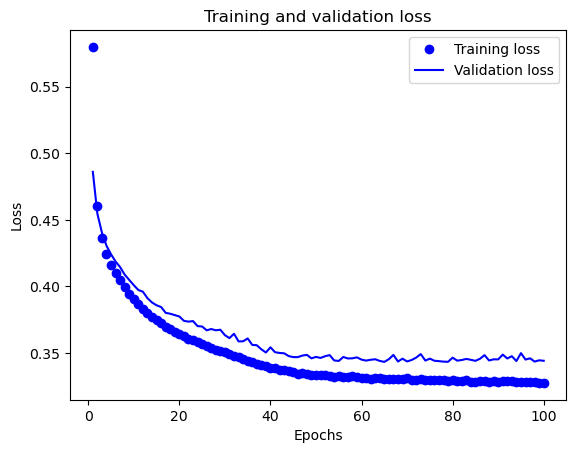

In [33]:
import matplotlib.pyplot as plt

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1, len(acc1) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


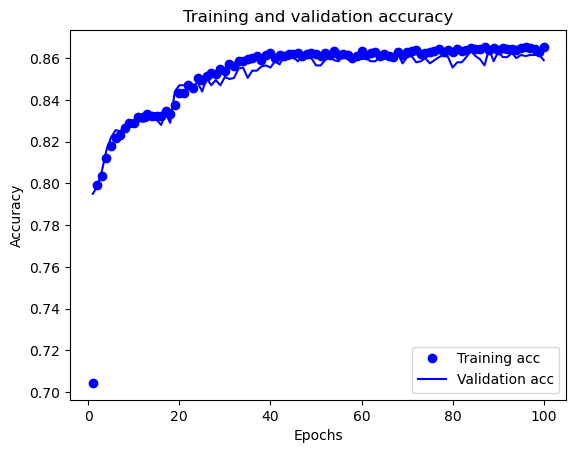

In [34]:
plt.clf()   # clear figure
acc_values = history1_dict['accuracy']
val_acc_values = history1_dict['val_accuracy']

plt.plot(epochs, acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
print('Training Accuracy: ', round(np.mean(acc1)*100,2))
print('Test Accuracy: ', round(np.mean(val_acc1)*100,2))

Training Accuracy:  85.28
Test Accuracy:  85.11


Once we have our trained network we are going to see what prediction it gives us for a new client in the bank, to do this we must collect the input data and convert it so that the network sees it as the same as the training data. 

We generate an array with the data and using the predict method (inside we scale the array). In this example, this new customer will not leave the bank with a 3% probability of doing so (we consider that he will if the probability is greater than 75%).

In [50]:
new = np.array([[0,0,600, 1, 40, 3, 60000, 2, 1, 1, 50000]])

new_prediction = clas.predict(sc_X.transform(new))

print('The customer leaves the bank: ',new_prediction[0,0] > 0.75,' with a probability of abandonment: ',new_prediction[0,0])

1/1 [==============================] - 0s 21ms/step
The customer leaves the bank:  False  with a probability of abandonment:  0.040750317


Vemos otro ejemplo, donde el cliente si abandona el banco con una probabilidad de hacerlo por encima del 95%.

In [49]:
new = np.array([[0,0,30, 0, 50, 1, 10000, 0, 1, 0, 30000]])

new_prediction = clas.predict(sc_X.transform(new))

print('The customer leaves the bank: ',new_prediction[0,0] > 0.75,' with a probability of abandonment: ',new_prediction[0,0])

1/1 [==============================] - 0s 31ms/step
The customer leaves the bank:  True  with a probability of abandonment:  0.99918014
